In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
bbox = dict(boxstyle ="round", fc = '1')
width = 0.25
beta = 2
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [20]:
def bar_plot(N,true_predict,true_nonpredict,failed_to_predict,insuff,neutral,params,labels,variant,early,xlabel,acc):
    '''Function to create a bar plot from the confusion matrix data.
    Inputs: 
    N = List of x-axis locations of the bars
    true_predict, true_nonpredict, failed_to_predict, insuff, neutral, early are the frequencies of each particular outcome for the
    parameter combination to be plotted. These should be lists, with a value for each bar
    params = string of the parameter choices; used to make the parameter table in the figure
    labels = tuple of strings that will label each individual bar on the x-axis
    variant = string of the parameter that you are changing; used as part of the title
    xlabel = x-axis label
    acc = favored accuracy metric for each combination to be plotted, here this number is MCC
    '''
    plt.figure(figsize=(5,5))
    plt.rcParams.update({'font.size': 10})
    p1 = plt.bar(N,insuff,width,color='gray')
    p7 = plt.bar(N,early,width,bottom=insuff,color='brown')
    p2 = plt.bar(N,neutral,width,bottom=early+insuff,color='yellow')
    p3 = plt.bar(N,failed_to_predict,width,bottom=early+neutral+insuff,color='orange')
    p4 = plt.bar(N,false_predict,width,bottom=early+failed_to_predict+neutral+insuff,color='red')
    p5 = plt.bar(N,true_nonpredict,width,bottom=early+false_predict+failed_to_predict+neutral+insuff,color='lime')
    p6 = plt.bar(N,true_predict,width,bottom=early+true_nonpredict+false_predict+failed_to_predict+neutral+insuff,color='green')
    plt.xticks(N,labels)
    plt.yticks(np.arange(0,130,10))
    plt.title('Result Summary with '+variant,fontsize=10)
    plt.text(-.175,6,params,bbox=bbox,fontsize=8)
    plt.legend((p6[0], p5[0],p4[0],p3[0],p2[0],p7[0],p1[0]), ('Correct Prediction','Correct Non-prediction','Incorrect Prediction','Failed to Predict','Neutral (Yellow TLS)','Too Early to Call','Insufficient Data'),loc='lower right',framealpha = 1,edgecolor='black',fontsize=8)
    plt.xlabel(xlabel)
    plt.text(N[0]-0.08,115,round(acc[0],3),fontsize=8) # The subtracted quantities from N[i] are just to center the number over the bar
    plt.text(N[1]-0.08,115,round(acc[1],3),fontsize=8)
    plt.text(N[2]-0.08,115,round(acc[2],3),fontsize=8)
    plt.text(N[3]-.03,115,round(acc[3],3),fontsize=8)
    plt.text(N[4]-0.08,115,round(acc[4],3),fontsize=8)
    plt.ylabel('Number of Events')
    plt.tight_layout()
    plt.savefig('figure2.svg')
    plt.show()

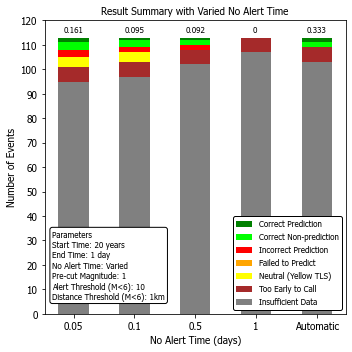

In [21]:
N = [0,0.5,1,1.5,2] # x-axis location for each bar
# Confusion Matrix Quantities for each parameter combination to be plotted
# These were just obtained by hand from the post-processing scripts
true_predict = np.array([2,1,1,0,2])
true_nonpredict = np.array([3,3,2,0,2])
false_predict = np.array([3,2,2,0,0])
failed_to_predict = np.array([0,0,0,0,0])
neutral = np.array([4,4,0,0,0])
early = np.array([6,6,6,6,6])
insuff = np.array([95,97,102,107,103])
# MCC for the above parameter combinations
mcc = [.161,.095,.092,0,.333]
params = 'Parameters \nStart Time: 20 years \nEnd Time: 1 day \nNo Alert Time: Varied \nPre-cut Magnitude: 1\nAlert Threshold (M<6): 10 \nDistance Threshold (M<6): 1km'
labels = ('0.05','0.1','0.5','1','Automatic')
variant = ('Varied No Alert Time')
xlabel = 'No Alert Time (days)'
bar_plot(N,true_predict,true_nonpredict,failed_to_predict,insuff,neutral,params,labels,variant,early,xlabel,mcc)